In [13]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [14]:
df = pd.read_csv('train_kaggle.csv')
print(df.head())

   id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding        63  
1                   Using LLMs to Train More LLMs        66  
2  Using LLMs to Win Friends and Influence People         9  
3      Using LLMs to Win More Kaggle Competitions        59  
4                      Using LLMs to Write Better        49  


## Exploratory data analysis

In this section, I will perform data analysis such as to see num_sold compared to the product, country, store etc. This so I can get a better idea on what the data is like.

## Encode the categorical variables

Since most of the ML Model only able to read numbers, I will encode all the categorical variables such as product, country and store.

In [15]:
# Initialize the LabelEncoder
label_encoder_store = LabelEncoder()
label_encoder_product = LabelEncoder()
label_encoder_country = LabelEncoder()

# Fit and transform the data
df['store_encoded'] = label_encoder_store.fit_transform(df['store'])
df['product_encoded'] = label_encoder_product.fit_transform(df['product'])
df['country_encoded'] = label_encoder_country.fit_transform(df['country'])

# Get the mapping between original categories and encoded labels
store_mapping = {label: integer for integer, label in enumerate(label_encoder_store.classes_)}
product_mapping = {label: integer for integer, label in enumerate(label_encoder_product.classes_)}
country_mapping = {label: integer for integer, label in enumerate(label_encoder_country.classes_)}

# Print the mapping
print(f"Mapping between original categories and encoded labels for store: {store_mapping}")
print(f"Mapping between original categories and encoded labels for product: {product_mapping}")
print(f"Mapping between original categories and encoded labels for country: {country_mapping}")

Mapping between original categories and encoded labels for store: {'Kagglazon': 0, 'Kaggle Learn': 1, 'Kaggle Store': 2}
Mapping between original categories and encoded labels for product: {'Using LLMs to Improve Your Coding': 0, 'Using LLMs to Train More LLMs': 1, 'Using LLMs to Win Friends and Influence People': 2, 'Using LLMs to Win More Kaggle Competitions': 3, 'Using LLMs to Write Better': 4}
Mapping between original categories and encoded labels for country: {'Argentina': 0, 'Canada': 1, 'Estonia': 2, 'Japan': 3, 'Spain': 4}


In [16]:
# Creating a new training dataframe to put in machine learning model
train_df = df[['id', 'date', 'country_encoded', 'store_encoded', 'product_encoded', 'num_sold']]
print(train_df.head())

# Adding new columns for day, month, year
# Convert the 'date' column to a datetime object if it's not already
train_df['date'] = pd.to_datetime(train_df['date'])

# Extract the month and create a new column 'month'
train_df['month'] = train_df['date'].dt.month

# Extract the day and create a new column 'day'
train_df['day'] = train_df['date'].dt.day

print(train_df.head())

   id        date  country_encoded  store_encoded  product_encoded  num_sold
0   0  2017-01-01                0              1                0        63
1   1  2017-01-01                0              1                1        66
2   2  2017-01-01                0              1                2         9
3   3  2017-01-01                0              1                3        59
4   4  2017-01-01                0              1                4        49
   id       date  country_encoded  store_encoded  product_encoded  num_sold  \
0   0 2017-01-01                0              1                0        63   
1   1 2017-01-01                0              1                1        66   
2   2 2017-01-01                0              1                2         9   
3   3 2017-01-01                0              1                3        59   
4   4 2017-01-01                0              1                4        49   

   month  day  
0      1    1  
1      1    1  
2      1    1  

C:\Users\hilma\AppData\Local\Temp\ipykernel_281308\2810225541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['date'] = pd.to_datetime(train_df['date'])
C:\Users\hilma\AppData\Local\Temp\ipykernel_281308\2810225541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['month'] = train_df['date'].dt.month
C:\Users\hilma\AppData\Local\Temp\ipykernel_281308\2810225541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

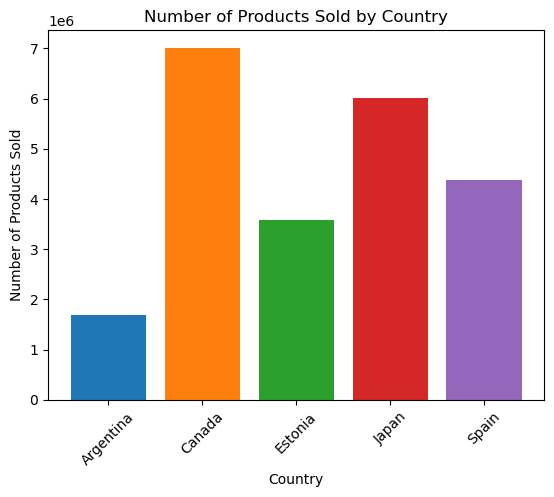

In [17]:
# Group by 'country' and sum 'num_sold'
country_sales = df.groupby('country')['num_sold'].sum().reset_index()

# Get a list of unique colors
colors = list(mcolors.TABLEAU_COLORS.values())

plt.bar(country_sales['country'], country_sales['num_sold'], color=colors[:len(country_sales)])
plt.xlabel('Country')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Country')
plt.xticks(rotation=45)
plt.show()

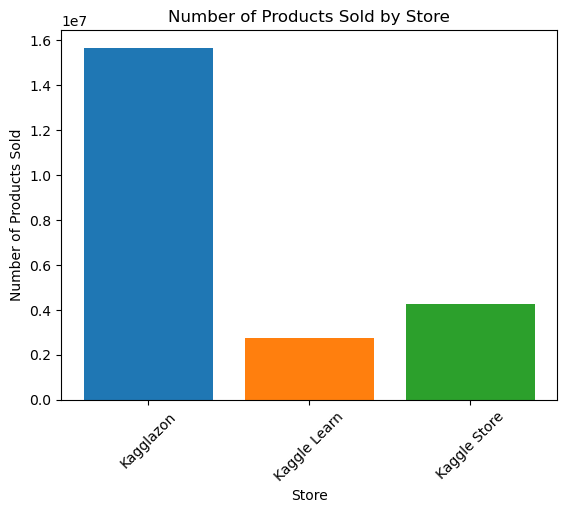

In [18]:
# Group by 'store' and sum 'num_sold'
store_sales = df.groupby('store')['num_sold'].sum().reset_index()

plt.bar(store_sales['store'], store_sales['num_sold'], color=colors[:len(store_sales)])
plt.xlabel('Store')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Store')
plt.xticks(rotation=45)
plt.show()

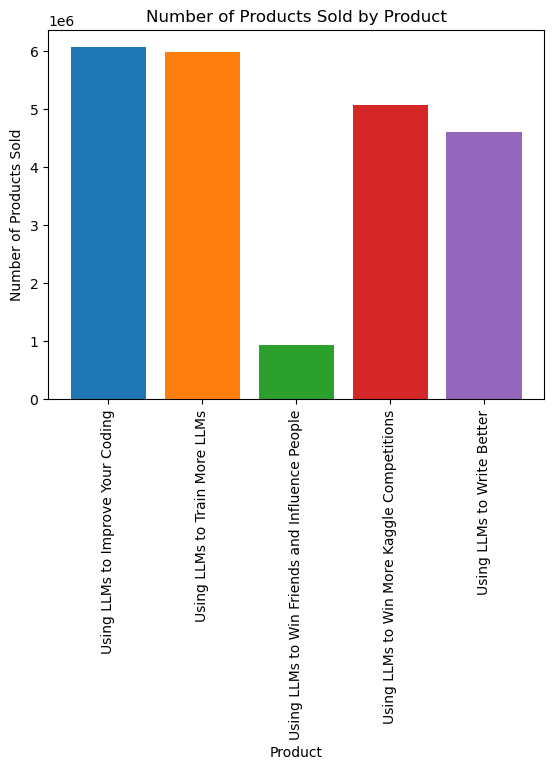

In [19]:
# Group by 'product' and sum 'num_sold'
product_sales = df.groupby('product')['num_sold'].sum().reset_index()

# Visualize the number of sold by each product
plt.bar(product_sales['product'], product_sales['num_sold'], color=colors[:len(product_sales)])
plt.xlabel('Product')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Product')
plt.xticks(rotation=90)
plt.show()

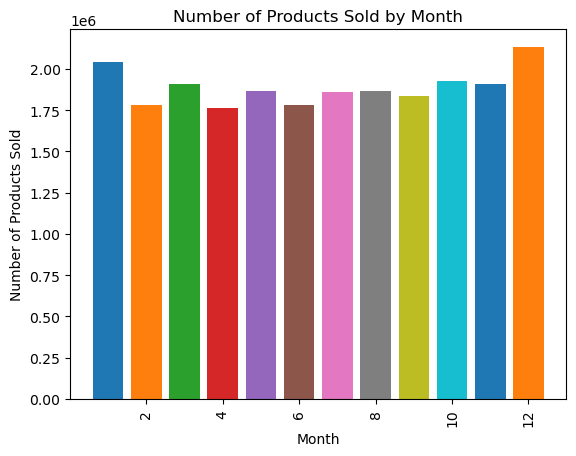

In [20]:
# Group by 'month' and sum 'num_sold'
month_sales = train_df.groupby('month')['num_sold'].sum().reset_index()

# Visualize the number of sold by each product by month
plt.bar(month_sales['month'], month_sales['num_sold'], color=colors[:len(month_sales)])
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Month')
plt.xticks(rotation=90)
plt.show()

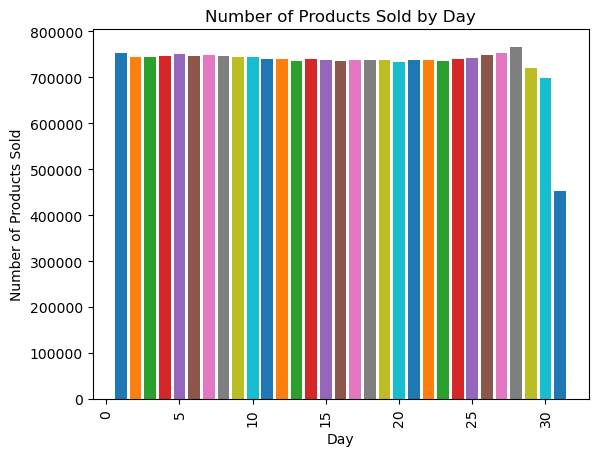

In [21]:
# Group by 'month' and sum 'num_sold'
day_sales = train_df.groupby('day')['num_sold'].sum().reset_index()

# Visualize the number of sold by each product by month
plt.bar(day_sales['day'], day_sales['num_sold'], color=colors[:len(day_sales)])
plt.xlabel('Day')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Day')
plt.xticks(rotation=90)
plt.show()

## Findings from EDA

From the EDA, I can deduce that type of products, store and country plays a huge role in the num_sold. now this can't be said the same on the month and day of the product being sold. For now I will assume that product, store and country is the variables that significantly affecting the num_sold, however further statistical test will be done to assess more on this information.

## Preparing for statistical test before the variables will be put in the machine learning model

To ensure that the model only will be learning all the relevant information, I will further run a statistical test for all the potential variables that can be put in inside the machine learning model. If possible I wanted to avoid putting unnecessary features inside the model as it may affect the model accuracy later on when tested.

In [22]:
print(df.head())

   id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  store_encoded  \
0               Using LLMs to Improve Your Coding        63              1   
1                   Using LLMs to Train More LLMs        66              1   
2  Using LLMs to Win Friends and Influence People         9              1   
3      Using LLMs to Win More Kaggle Competitions        59              1   
4                      Using LLMs to Write Better        49              1   

   product_encoded  country_encoded  
0                0                0  
1                1                0  
2                2                0  
3                3                0  
4                4                0  


## Ran a correlation test between all the variables inside the model

In the process of building my model, I found it essential to run a correlation test for all the variables. Here's why this step was crucial:

##### Understanding Relationships: 
The correlation test helped me identify linear relationships between variables, guiding my decisions for feature selection and engineering.

##### Identifying Multicollinearity: 
I was able to detect multicollinearity, where two or more features are highly correlated with each other. This understanding allowed me to handle correlated features to improve my model's interpretability and performance.

##### Feature Selection: 
By analyzing correlations with the target variable, I could identify the most relevant features for my model, leading to a more focused and effective model.

##### Detecting Potential Outliers or Errors: 
Unexpected correlations helped me spot potential data quality issues and outliers, ensuring the integrity of my dataset.

##### Assumptions Check: 
Since some models assume little to no multicollinearity among independent variables, checking correlations helped me validate these assumptions for my chosen model.

##### Guiding Transformation and Preprocessing: 
Correlation analysis assisted me in deciding if certain variables needed transformations to better capture their relationships with the target variable.

##### Enhancing Interpretability: 
Understanding how variables are correlated allowed me to interpret my model's results more accurately and provide meaningful insights.

##### Avoiding Redundancy: 
By identifying highly correlated features, I avoided redundancy in my model, focusing on features that genuinely contribute to predictive power.

##### Improving Generalization: 
Careful feature selection based on correlation enabled me to create a model that is less prone to overfitting and better generalizes to unseen data.


id                 0.008029
country_encoded    0.123562
store_encoded     -0.555510
product_encoded   -0.108381
num_sold           1.000000
month              0.009355
day                0.003264
Name: num_sold, dtype: float64


C:\Users\hilma\AppData\Local\Temp\ipykernel_281308\523538836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


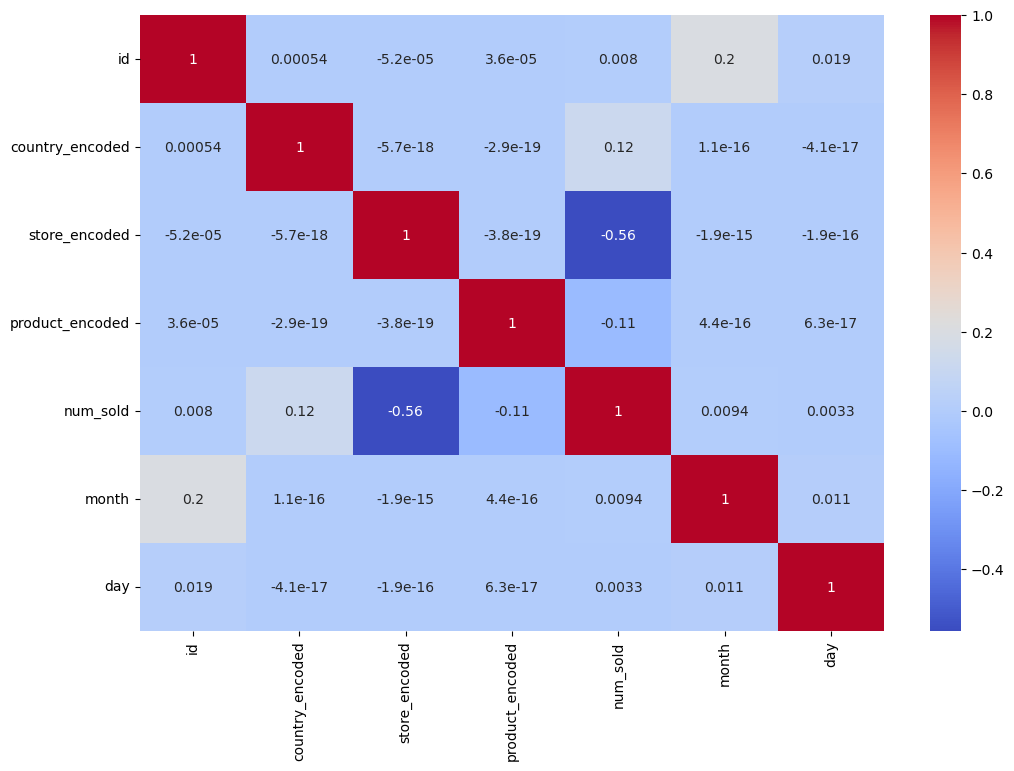

In [23]:
# Ran a correlation test to the model
correlation_matrix = train_df.corr()

# View correlation with target variable
correlation_with_target = correlation_matrix['num_sold']
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Issues on evaluating the correlation of variables

As can see from above, I tried to use pearson correlation test to identify the correlation rate between all these variables. This method does not really tell the full story as the product_encoded, store_encoded and country_encoded are not ordinal but these are categorical variables. Because of this i will try to use anova test to observe the p-value. This reason because anova test can provide the full story of the correlation rate and will not treat the variables as ordinal like the pearson correlation did.

In [24]:
# Group the target variable by the categories of the feature
groups_store = [train_df['num_sold'][train_df['store_encoded'] == category] for category in train_df['store_encoded'].unique()]
groups_product = [train_df['num_sold'][train_df['product_encoded'] == category] for category in train_df['product_encoded'].unique()]
groups_country = [train_df['num_sold'][train_df['country_encoded'] == category] for category in train_df['country_encoded'].unique()]
groups_month = [train_df['num_sold'][train_df['month'] == category] for category in train_df['month'].unique()]
groups_day = [train_df['num_sold'][train_df['day'] == category] for category in train_df['day'].unique()]

# Perform one-way ANOVA 
f_statistic_store, p_value_store = stats.f_oneway(*groups_store)
f_statistic_product, p_value_product = stats.f_oneway(*groups_product)
f_statistic_country, p_value_country = stats.f_oneway(*groups_country)
f_statistic_month, p_value_month = stats.f_oneway(*groups_month)
f_statistic_day, p_value_day = stats.f_oneway(*groups_day)

print(f"For store_encoded:")
print("F-statistic for store_encode:", f_statistic_store)
print("P-value for store_encoded:", p_value_store)
print(f"For product_encoded:")
print("F-statistic for product_encoded:", f_statistic_product)
print("P-value for product_encoded:", p_value_product)
print("For country_encoded:")
print("F-statistic for country_encoded:", f_statistic_country)
print("P-value for country_encoded:", p_value_country)
print("For Month:")
print("F-statistic for Month:", f_statistic_month)
print("P-value for Month:", p_value_month)
print("For Day:")
print("F-statistic for Day:", f_statistic_day)
print("P-value for Day:", p_value_day)

For store_encoded:
F-statistic for store_encode: 61317.977532690245
P-value for store_encoded: 0.0
For product_encoded:
F-statistic for product_encoded: 5584.182617718968
P-value for product_encoded: 0.0
For country_encoded:
F-statistic for country_encoded: 5457.208695802564
P-value for country_encoded: 0.0
For Month:
F-statistic for Month: 20.879702366058446
P-value for Month: 5.4156612801338105e-43
For Day:
F-statistic for Day: 0.6547648796687646
P-value for Day: 0.9254933819365411


## Result of the ANOVA test for all the variables against the dependent variables

As we can see here, all the variables tested has a very high F-stats and all of the variables also has a p-value that are less than 0.05. This means that all the variables are significant to the num_sold except for the day. As we can see, the day variable has a very high p-value (0.93) while the F-stats is low at 0.65. This indicates that the day variable is not significant to the num_sold.

In [25]:
print(train_df.head())

   id       date  country_encoded  store_encoded  product_encoded  num_sold  \
0   0 2017-01-01                0              1                0        63   
1   1 2017-01-01                0              1                1        66   
2   2 2017-01-01                0              1                2         9   
3   3 2017-01-01                0              1                3        59   
4   4 2017-01-01                0              1                4        49   

   month  day  
0      1    1  
1      1    1  
2      1    1  
3      1    1  
4      1    1  


In [33]:
# Splitting the data into training and testing sets
X = train_df[['country_encoded', 'store_encoded', 'product_encoded', 'month', 'day']]
y = train_df['num_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)  # Calculating R-squared for Random Forest
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

# Creating the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgboost_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_xgb = xgboost_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)  # Calculating R-squared for XGBoost
print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R-squared:", r2_xgb)

Random Forest Mean Squared Error: 1343.3498987152277
Random Forest R-squared: 0.9602000340665889
XGBoost Mean Squared Error: 939.7417325036291
XGBoost R-squared: 0.9721578949939849


# Result of the Random Forest Regressor and XGBoost Model

## Random Forest Regressor:
### Mean Squared Error (MSE): 1343.35
This represents the average squared difference between the actual and predicted values. A lower MSE means the model's predictions are closer to the actual values. The value of 1343.35 means that, on average, the squared differences between the predicted and actual values are 1343.35. It's a measure of the model's overall error.

### R-squared:  0.9602
The R-squared score is a measure of how well the model's predictions match the actual values. It ranges from 0 to 1, with 1 indicating perfect prediction. An R-squared score of 0.9602 means that approximately 96.02% of the variance in the dependent variable is explained by the model. This indicates a very strong fit to the data.

## XGBoost:
### Mean Squared Error (MSE): 939.74
Similar to the Random Forest's MSE, this represents the average squared difference between the actual and predicted values for the XGBoost model. A lower value (compared to Random Forest) indicates that the XGBoost model's predictions are, on average, closer to the actual values.

### R-ssquared:  Score: 0.9722
The R-squared score for the XGBoost model is 0.9722, meaning that approximately 97.22% of the variance in the dependent variable is explained by the model. This score is slightly higher than the Random Forest's R-squared, indicating a slightly better fit to the data.

## Summary:
Both models perform very well, with high R-squared scores indicating a strong fit to the data.
The XGBoost model has a slightly lower MSE and a slightly higher R-squared score, suggesting that it may be performing slightly better in fitting the data in this particular case.